# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df.shape

(4324, 9)

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [9]:
df.sort_values('Price')

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3683,3683,3683,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 04, 1968 12:00 UTC",Saturn V | Apollo 6,StatusRetired,"1,160.0",Partial Failure
3149,3149,3149,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon May 14, 1973 17:30 UTC",Saturn V | Skylab 1,StatusRetired,"1,160.0",Success
3180,3180,3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Tue Dec 19, 1972 19:24 UTC",Saturn V | Apollo 17,StatusRetired,"1,160.0",Success
3243,3243,3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.0",Success
3384,3384,3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jan 31, 1971 21:03 UTC",Saturn V | Apollo 14,StatusRetired,"1,160.0",Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [10]:
df.isnull().sum(axis = 0)

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [11]:
df.duplicated().values.any()

False

### Fixing the price

In [12]:
df['Price'] = pd.to_numeric(df.Price.str.replace(',',''))

### Fixing the date

In [13]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))

In [14]:
df['Date'] = pd.to_datetime(df.Date)

In [15]:
df.dtypes

Unnamed: 0.1               int64
Unnamed: 0                 int64
Organisation              object
Location                  object
Date              datetime64[ns]
Detail                    object
Rocket_Status             object
Price                    float64
Mission_Status            object
dtype: object

## Descriptive Statistics

In [16]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Date,Price
count,"4,324.00","4,324.00",4324,964.00
mean,"2,161.50","2,161.50",1987-11-28 05:24:01.998149824,153.79
min,0.00,0.00,1957-10-04 00:00:00,5.30
25%,"1,080.75","1,080.75",1972-04-19 18:00:00,40.00
50%,"2,161.50","2,161.50",1984-12-16 12:00:00,62.00
75%,"3,242.25","3,242.25",2002-09-10 12:00:00,164.00
max,"4,323.00","4,323.00",2020-08-07 00:00:00,"5,000.00"
std,"1,248.38","1,248.38",NaN,288.45


## add columns 'year' and 'month'
#### https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column


In [17]:

# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [18]:
launches_per_organisation = df.Organisation.value_counts().reset_index()
launches_per_organisation.rename(columns={'count': 'launches'}, inplace=True)


In [19]:
launches_per_organisation

,Organisation,launches
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


Text(0.5, 1.0, 'Launches per organization')

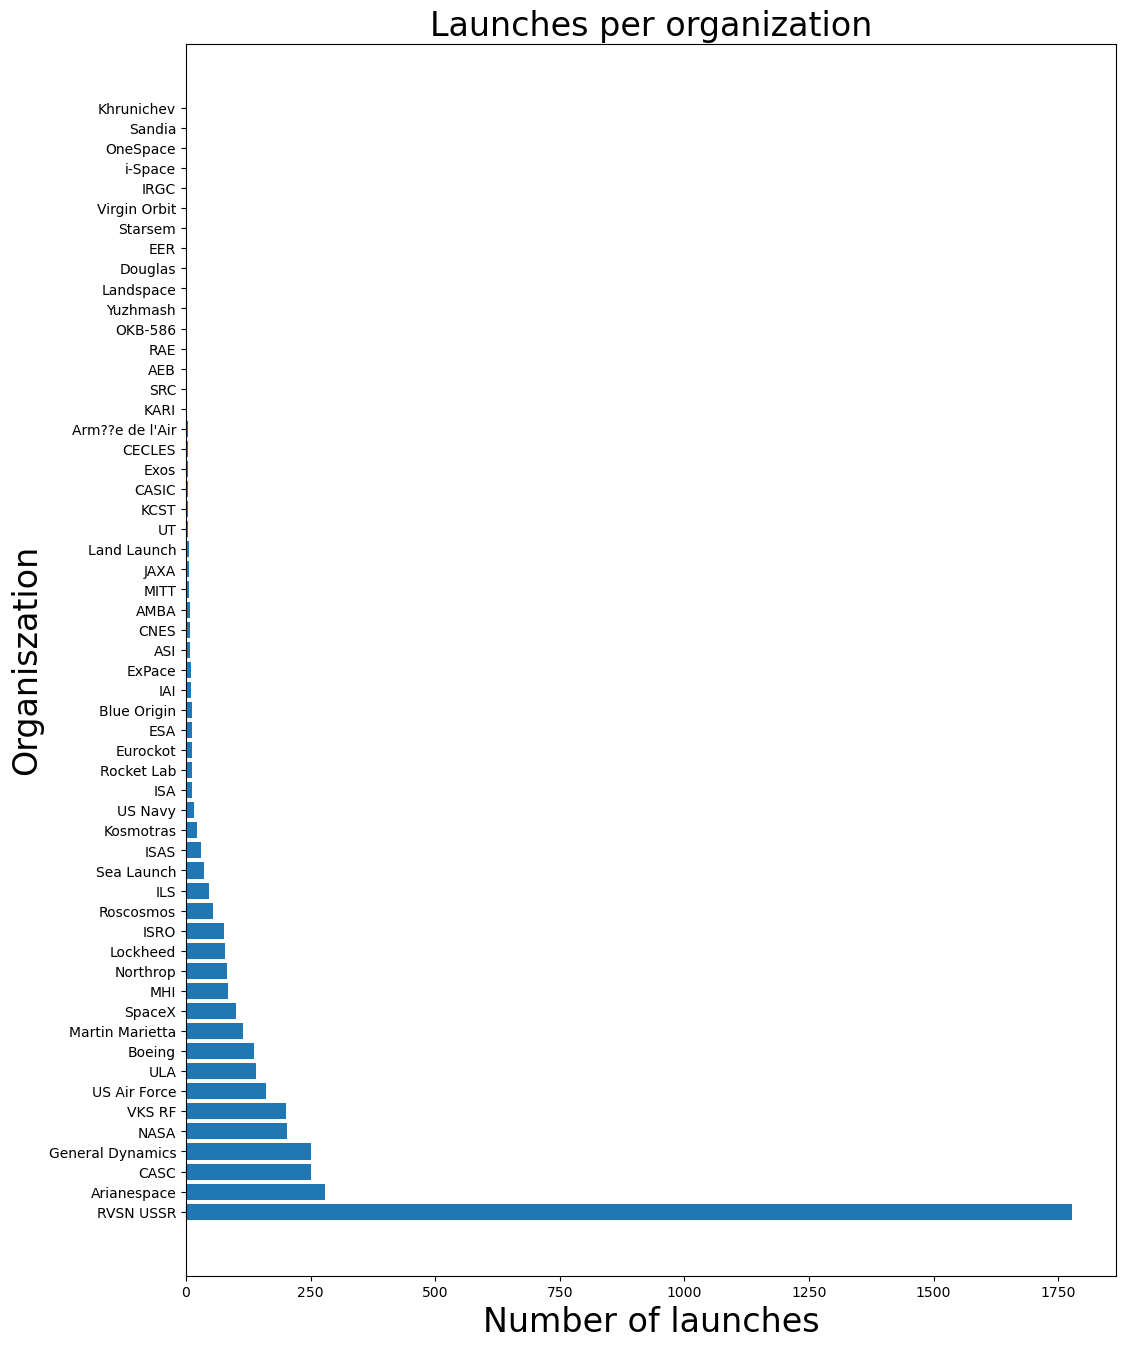

In [110]:
plt.figure(figsize=(12, 16))
plt.barh( launches_per_organisation.Organisation, launches_per_organisation.launches  )
plt.ylabel("Organiszation", fontsize=24)
plt.xlabel("Number of launches", fontsize=24)
plt.title("Launches per organization", fontsize=24)


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [21]:
df['Rocket_Status'].value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

In [22]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status', 'year', 'month'],
      dtype='object')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [23]:
df['Mission_Status'].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [24]:
df_with_price =  df[df['Price'] > 0]

In [25]:
df.shape

(4324, 11)

In [26]:
df_with_price.shape

(964, 11)

/home/me/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



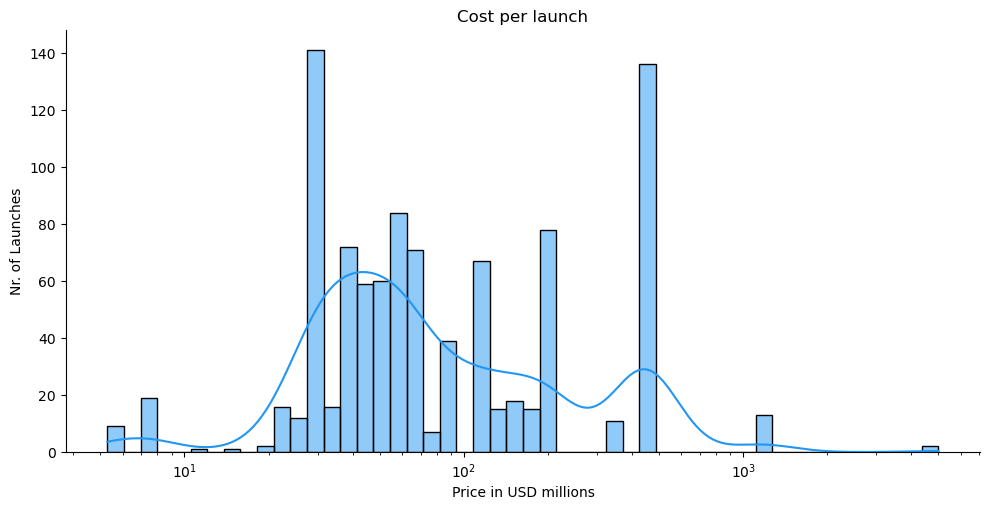

In [102]:
sns.displot(df_with_price['Price'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3',
           log_scale=True)

plt.title("Cost per launch")
plt.xlabel('Price in USD millions')
plt.ylabel('Nr. of Launches')

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [28]:
# https://www.geeksforgeeks.org/get-the-substring-of-the-column-in-pandas-python/
df['country'] = df.Location.str.extract(r'.*,\s(.*)$',  expand = True)

In [29]:
# https://stackoverflow.com/questions/57653822/how-to-set-value-to-a-cell-filtered-by-rows-in-python-dataframe
df.loc[df['country'] == 'Russia', 'country'] = 'Russian Federation'
df.loc[df['country'] == 'New Mexico', 'country'] = 'USA'
df.loc[df['country'] == 'Yellow Sea', 'country'] = 'China'
df.loc[df['country'] == 'Shahrud Missile', 'country'] = 'Iran'
df.loc[df['country'] == 'Shahrud Missile Test Site', 'country'] = 'Iran'
df.loc[df['country'] == 'Pacific Ocean', 'country'] = 'USA'
df.loc[df['country'] == 'Pacific Missile Range Facility', 'country'] = 'USA'
df.loc[df['country'] == 'Barents Sea', 'country'] = 'Russian Federation'
df.loc[df['country'] == 'Gran Canaria', 'country'] = 'USA'


In [30]:
def get_code(country):
#     print(country)
    if country.lower() == 'iran':
        return 'IRN'
    elif country.lower() == "north korea":
        return 'PRK'
    elif country.lower() == "south korea":
        return 'KOR'
    else:
        return countries.get(country)[2]

In [31]:
df['code'] = df['country'].apply(get_code)  

In [32]:
# df.loc[(df['code'] == "RUS") & (df['code'] == "RUS")]

In [33]:
df.loc[(df['Mission_Status'] == "Failure") & (df['code'] == "RUS")]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year,month,country,code
301,301,301,Roscosmos,"Site 1S, Vostochny Cosmodrome, Russia",2017-11-28,Soyuz 2.1b/Fregat-M | Meteor-M No.2-1 & Ridesh...,StatusActive,NaN,Failure,2017,11,Russian Federation,RUS
944,944,944,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia",2005-10-08,Rokot/Briz KM | CryoSat-1,StatusRetired,41.80,Failure,2005,10,Russian Federation,RUS
957,957,957,SRC,"K-496 Submarine, Barents Sea Launch Area, Bare...",2005-06-21,Volna | Cosmos 1,StatusRetired,NaN,Failure,2005,6,Russian Federation,RUS
958,958,958,VKS RF,"Site 16/2, Plesetsk Cosmodrome, Russia",2005-06-21,Molniya-M /Block ML | Molniya-3K n†­175,StatusRetired,NaN,Failure,2005,6,Russian Federation,RUS
1157,1157,1157,VKS RF,"Site 32/1, Plesetsk Cosmodrome, Russia",2000-12-27,Tsyklon-3 | Cosmos 2377 to 2379 & Gonets 7 to 9,StatusRetired,NaN,Failure,2000,12,Russian Federation,RUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,4084,4084,RVSN USSR,"Mayak-2, Kapustin Yar, Russia",1963-06-01,Cosmos-2I (63S1) | DS-MT #1,StatusRetired,NaN,Failure,1963,6,Russian Federation,RUS
4093,4093,4093,RVSN USSR,"Mayak-2, Kapustin Yar, Russia",1963-04-06,Cosmos-2I (63S1) | DS-P1 #2,StatusRetired,NaN,Failure,1963,4,Russian Federation,RUS
4116,4116,4116,RVSN USSR,"Mayak-2, Kapustin Yar, Russia",1962-10-25,Cosmos-2I (63S1) | 1MS #2,StatusRetired,NaN,Failure,1962,10,Russian Federation,RUS
4183,4183,4183,RVSN USSR,"Mayak-2, Kapustin Yar, Russia",1961-12-21,Cosmos-2I (63S1) | DS-1 2,StatusRetired,NaN,Failure,1961,12,Russian Federation,RUS


# Use a Choropleth Map to Show the Number of Failures by Country


In [37]:
flops =  df[ df['Mission_Status'] == 'Failure']
# flops_per_country = flops.groupby('code').agg({'code': pd.Series.count}) 
flops_per_country = flops.groupby('code').agg(failures_count=('code', pd.Series.count)) 
flops_per_country
# agg(min_height=('height', 'min')

,failures_count
code,
AUS,3
BRA,2
CHN,19
FRA,13
IND,8
IRN,8
ISR,2
JPN,10
KAZ,72


In [103]:
world_map = px.choropleth(flops_per_country,
                          locations=flops_per_country.index,
                          color='failures_count', 
                          hover_name='failures_count', 
                          color_continuous_scale=px.colors.sequential.matter,
                         title="Failed launches per coutry")

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [39]:
sunburstdata = df.groupby(by=['country', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})
sunburstdata = sunburstdata.sort_values('Mission_Status', ascending=False)

In [104]:
sunburstdata = df.groupby(by=['country', 'Organisation', 'Mission_Status'], as_index=False).agg({'Mission_Status': pd.Series.count})
sunburstdata = sunburstdata.sort_values('Mission_Status', ascending=False)

In [107]:
burst = px.sunburst(sunburstdata, 
                    path=['country', 'Organisation', 'Mission_Status'], 
                    values='Mission_Status',
                    title='Failed and Succesful Launches per Country and Organisation',
                   )
 
burst.update_layout(xaxis_title='xaxis_title', 
                    yaxis_title='yaxis_title',
                    coloraxis_showscale=False)
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [41]:
total_cost = df_with_price.groupby('Organisation').agg(total=('Price', 'sum')).sort_values(by='total', ascending=False)

In [42]:
total_cost


,total
Organisation,
NASA,"76,280.00"
Arianespace,"16,345.00"
ULA,"14,798.00"
RVSN USSR,"10,000.00"
CASC,"6,340.26"
SpaceX,"5,444.00"
Northrop,"3,930.00"
MHI,"3,532.50"
ISRO,"2,177.00"


Text(0.5, 1.0, 'Total spent on launches in millions of USD')

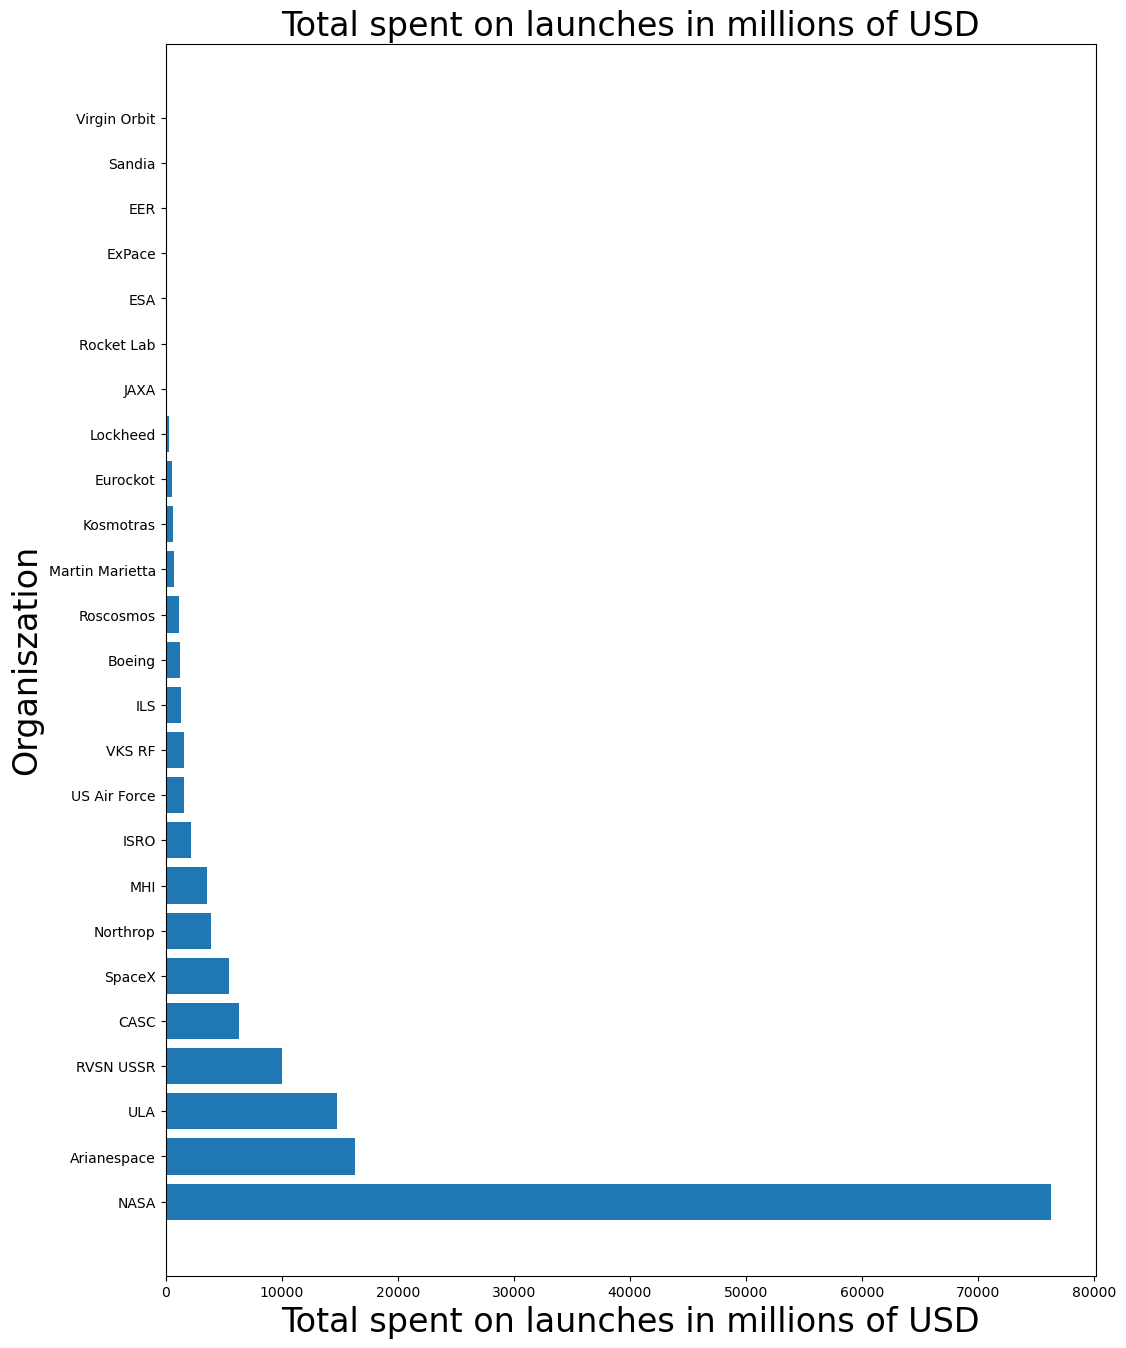

In [112]:
plt.figure(figsize=(12, 16))
plt.barh(total_cost.index, total_cost.total)
plt.ylabel("Organiszation", fontsize=24)
plt.xlabel("Total spent on launches in millions of USD", fontsize=24)
plt.title("Total spent on launches in millions of USD", fontsize=24)

# Analyse the Amount of Money Spent by Organisation per Launch

In [44]:
cost_per_launch = df_with_price.groupby('Organisation')['Price']

In [45]:
cost_per_launch.describe().sort_values('mean', ascending=False)


,count,mean,std,min,25%,50%,75%,max
Organisation,,,,,,,,
RVSN USSR,2.00,"5,000.00",0.00,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
NASA,149.00,511.95,201.04,450.00,450.00,450.00,450.00,"1,160.00"
Boeing,7.00,177.29,77.72,133.00,133.00,164.00,164.00,350.00
Arianespace,96.00,170.26,61.73,37.00,200.00,200.00,200.00,200.00
ULA,98.00,151.00,70.27,109.00,109.00,123.00,153.00,350.00
ILS,13.00,101.54,32.56,65.00,65.00,109.00,130.00,153.00
MHI,37.00,95.47,9.79,90.00,90.00,90.00,90.00,112.50
Martin Marietta,9.00,80.16,53.55,35.00,35.00,35.00,136.60,136.60
US Air Force,26.00,59.65,1.56,59.00,59.00,59.00,59.00,63.23


In [113]:
box = px.box(df_with_price, 
             x=df_with_price.Organisation, 
             y=df_with_price.Price,
             log_y=True,
             title='Cost per launch')
 
box.update_layout(xaxis_title='organisation',
                  yaxis_title='cost per launch',)
 
box.show()

In [48]:
pd.set_option('display.max_rows', 10)

# Chart the Number of Launches per Year

In [117]:
# rename agg columns: https://stackoverflow.com/questions/19078325/naming-returned-columns-in-pandas-aggregate-function

launches_per_year = df.groupby('year').agg(launches=('year', 'count')).reset_index() 
launches_per_year

,year,launches
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


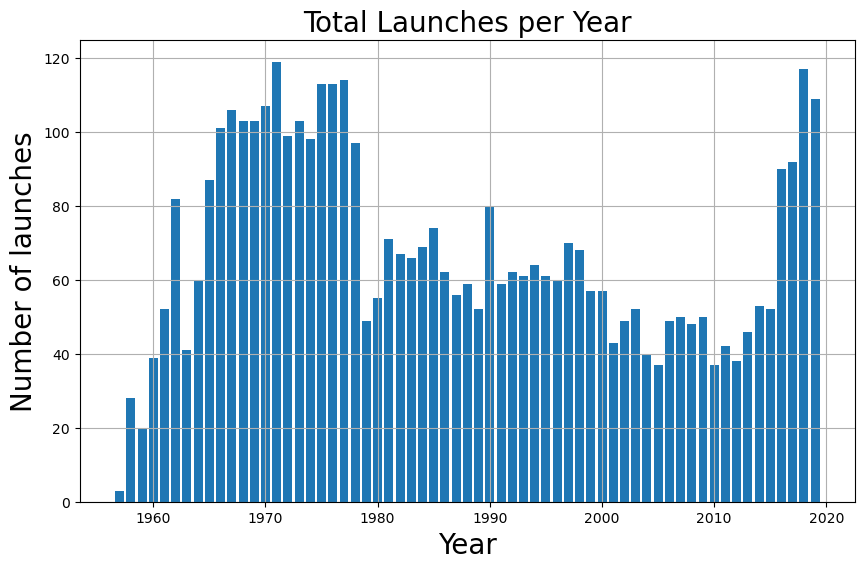

In [121]:
plt.figure(figsize=(10,6))
plt.bar(launches_per_year.year[:-1], launches_per_year.launches[:-1]) 
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of launches", fontsize=20)
plt.title("Total Launches per Year", fontsize=20)
plt.grid()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [151]:
# monthly_launches = df.resample('M', on='Date').agg(launches=('Date', 'count'))
monthly_launches = df.resample('M', on='Date').count() #.reset_index()
monthly_launches = monthly_launches[['month']]
monthly_launches.rename(columns={'month':"launches"}, inplace=True)
monthly_launches


,launches
Date,
1957-10-31,1
1957-11-30,1
1957-12-31,1
1958-01-31,0
1958-02-28,2
...,...
2020-04-30,5
2020-05-31,9
2020-06-30,7


In [157]:
roll_df = monthly_launches.rolling(window=12).mean()
roll_df

,launches
Date,
1957-10-31,NaN
1957-11-30,NaN
1957-12-31,NaN
1958-01-31,NaN
1958-02-28,NaN
...,...
2020-04-30,9.17
2020-05-31,9.17
2020-06-30,9.17


<BarContainer object of 755 artists>

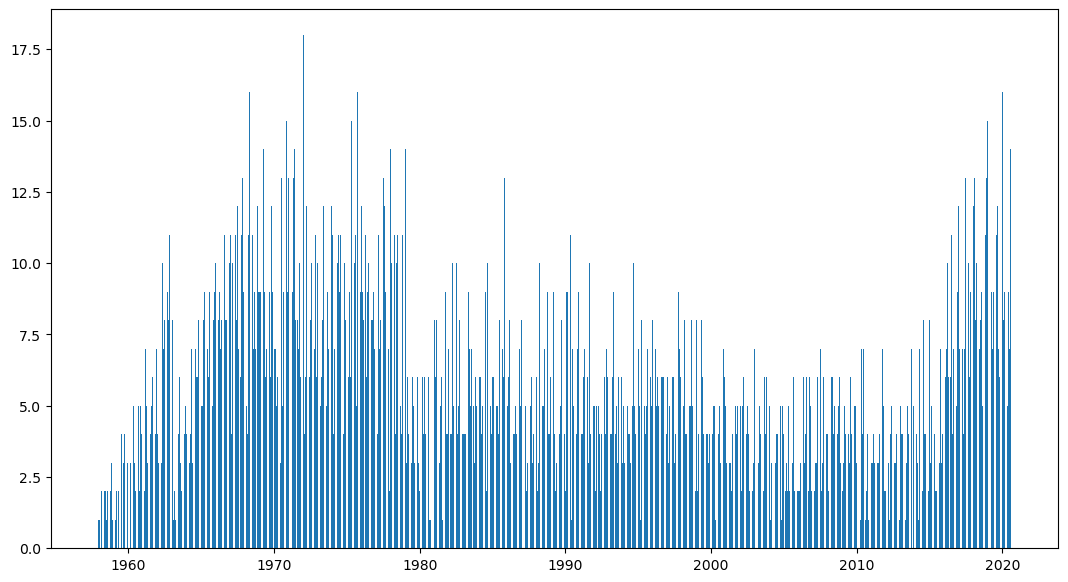

In [168]:
plt.figure(figsize=(13, 7))
plt.bar(monthly_launches.index, monthly_launches.launches, width=20) 


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [178]:
launches_per_month = df.groupby('month').agg(total=('month', 'count')).reset_index()
launches_per_month.month.replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'],inplace=True)
launches_per_month

,month,total
0,January,268
1,February,336
2,March,353
3,April,383
4,May,326
...,...,...
7,August,373
8,September,365
9,October,381
10,November,336


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

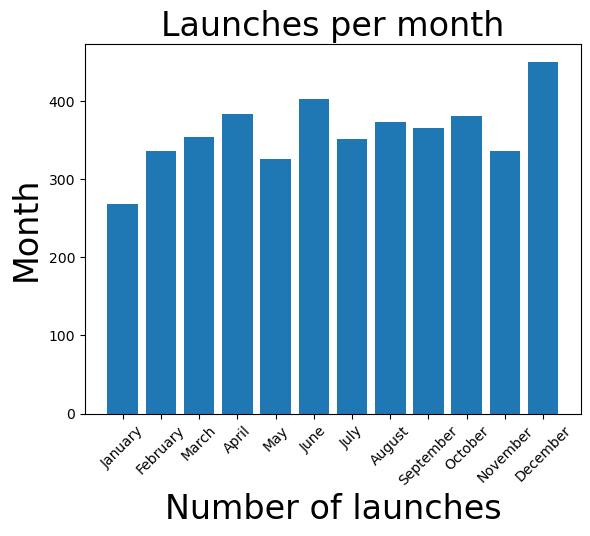

In [182]:
plt.bar(launches_per_month.month, launches_per_month.total)
plt.ylabel("Month", fontsize=24)
plt.xlabel("Number of launches", fontsize=24)
plt.title("Launches per month", fontsize=24)
plt.xticks(rotation=45)


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [55]:
cost_per_year =  df_with_price.groupby('year').agg(avg=('Price', 'mean')) 
cost_per_year

,avg
year,
1964,63.23
1965,63.23
1966,59.00
1967,196.62
1968,279.20
...,...
2016,79.46
2017,69.49
2018,64.75


Text(0.5, 1.0, 'Average launch price over time')

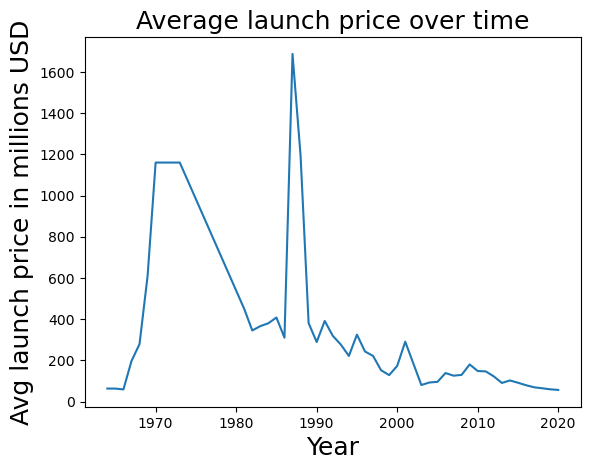

In [184]:
plt.plot(cost_per_year.index, cost_per_year.avg)
plt.ylabel("Avg launch price in millions USD", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.title("Average launch price over time", fontsize=18)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [57]:
top10 = launches_per_organisation[:10]['Organisation'].to_list()
filt = df.Organisation.isin(top10)

In [58]:
dftop10 = df[filt]

In [59]:
top10_per_year = dftop10.groupby(['year', 'Organisation']).agg(launches=('Organisation', 'count'))
top10_per_year

launches
year Organisation              
1957 RVSN USSR                2
1958 NASA                     2
     RVSN USSR                5
     US Air Force             2
1959 General Dynamics         1
...                         ...
2019 VKS RF                   8
2020 Arianespace              4
     CASC                    19
     ULA                      4
     VKS RF                   3

[323 rows x 1 columns]

In [60]:
# flatten multi-index to single index   
# https://stackoverflow.com/questions/32938060/reverting-from-multiindex-to-single-index-dataframe-in-pandas 
top10_per_year = top10_per_year.reset_index(level=[0,1])

In [61]:
top10_per_year

,year,Organisation,launches
0,1957,RVSN USSR,2
1,1958,NASA,2
2,1958,RVSN USSR,5
3,1958,US Air Force,2
4,1959,General Dynamics,1
...,...,...,...
318,2019,VKS RF,8
319,2020,Arianespace,4
320,2020,CASC,19
321,2020,ULA,4


In [185]:
line = px.line(top10_per_year[:-1],
              x='year',
              y='launches',
              color='Organisation',
              title="Number of launches over time")
line.show()

In [63]:
filt = df['code'] == 'RUS'
rus = df[filt]

In [64]:
ruski = rus.groupby('year').count()

In [186]:
pd.set_option('display.max_rows', None)
plt.ylabel("Organiszation", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.title("Launches per organization", fontsize=18)

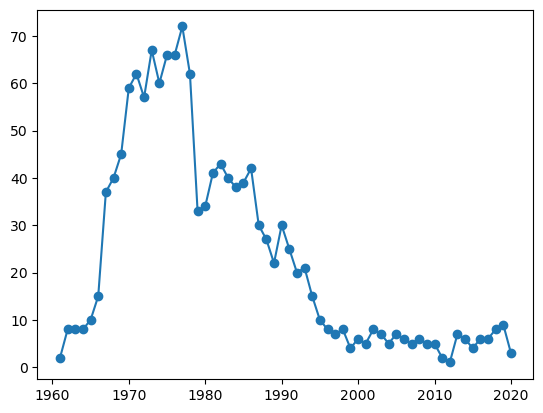

In [66]:
plt.plot(ruski.index, ruski.code, marker='o')

In [67]:
russian = df.loc[filt]

In [68]:
russian.Organisation.unique()

array(['VKS RF', 'Roscosmos', 'Eurockot', 'Kosmotras', 'Khrunichev',
       'SRC', 'MITT', 'RVSN USSR', 'Yuzhmash'], dtype=object)

In [69]:
filt = df.Organisation == 'RVSN USSR'
ussr = df.loc[filt] 

In [70]:
ussr_per_year = ussr.groupby('year').count()


In [71]:
filt = df.year == 1972
y72 = df.loc[filt]


In [72]:
y72

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year,month,country,code
3174,3174,3174,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",1972-12-28,Vostok-2M | Cosmos 542,StatusRetired,NaN,Partial Failure,1972,12,Russian Federation,RUS
3175,3175,3175,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1972-12-27,Soyuz M | Cosmos 541,StatusRetired,NaN,Success,1972,12,Russian Federation,RUS
3176,3176,3176,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1972-12-25,Cosmos-3M (11K65M) | Cosmos 540,StatusRetired,NaN,Success,1972,12,Russian Federation,RUS
3177,3177,3177,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1972-12-21,Titan III(24)B | OPS 3978,StatusRetired,NaN,Success,1972,12,USA,USA
3178,3178,3178,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1972-12-21,Cosmos-3M (11K65M) | Cosmos 539,StatusRetired,NaN,Success,1972,12,Russian Federation,RUS
3179,3179,3179,General Dynamics,"LC-13, Cape Canaveral AFS, Florida, USA",1972-12-20,Atlas-SLV3A Agena-D | AFP-827 (Canyon-5),StatusRetired,NaN,Success,1972,12,USA,USA
3180,3180,3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1972-12-19,Saturn V | Apollo 17,StatusRetired,"1,160.00",Success,1972,12,USA,USA
3181,3181,3181,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",1972-12-14,Voskhod | Cosmos 538,StatusRetired,NaN,Success,1972,12,Russian Federation,RUS
3182,3182,3182,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1972-12-12,Molniya-M /Block L | Molniya-2 n†­31,StatusRetired,NaN,Success,1972,12,Russian Federation,RUS
3183,3183,3183,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1972-12-02,Molniya-M /Block L | Molniya-1 n†­30,StatusRetired,NaN,Success,1972,12,Kazakhstan,KAZ


In [73]:
filt = df.code == 'KAZ'
kaz = df.loc[filt] 
kaz

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year,month,country,code
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,Kazakhstan,KAZ
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,2020,7,Kazakhstan,KAZ
33,33,33,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-04-25,Soyuz 2.1a | Progress MS-14,StatusActive,48.50,Success,2020,4,Kazakhstan,KAZ
37,37,37,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-04-09,Soyuz 2.1a | Soyuz MS-16,StatusActive,48.50,Success,2020,4,Kazakhstan,KAZ
40,40,40,Arianespace,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-03-21,Soyuz 2.1b/Fregat | OneWeb #3,StatusActive,48.50,Success,2020,3,Kazakhstan,KAZ
54,54,54,Arianespace,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-02-06,Soyuz 2.1b/Fregat | OneWeb #2,StatusActive,48.50,Success,2020,2,Kazakhstan,KAZ
65,65,65,Roscosmos,"Site 81/24, Baikonur Cosmodrome, Kazakhstan",2019-12-24,Proton-M/DM-3 | Elektro-L n†­3,StatusActive,65.00,Success,2019,12,Kazakhstan,KAZ
76,76,76,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2019-12-06,Soyuz 2.1a | Progress MS-13 (74P),StatusActive,48.50,Success,2019,12,Kazakhstan,KAZ
95,95,95,ILS,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2019-10-09,Proton-M/Briz-M | Eutelsat 5 West B & MEV-1,StatusActive,65.00,Success,2019,10,Kazakhstan,KAZ
98,98,98,Roscosmos,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",2019-09-25,Soyuz FG | Soyuz MS-15 (61S),StatusRetired,NaN,Success,2019,9,Kazakhstan,KAZ


In [74]:
filt = df.Organisation == 'Roscosmos'
rosco = df.loc[filt]
rosco

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year,month,country,code
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,Kazakhstan,KAZ
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,2020,7,Kazakhstan,KAZ
33,33,33,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-04-25,Soyuz 2.1a | Progress MS-14,StatusActive,48.50,Success,2020,4,Kazakhstan,KAZ
37,37,37,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-04-09,Soyuz 2.1a | Soyuz MS-16,StatusActive,48.50,Success,2020,4,Kazakhstan,KAZ
65,65,65,Roscosmos,"Site 81/24, Baikonur Cosmodrome, Kazakhstan",2019-12-24,Proton-M/DM-3 | Elektro-L n†­3,StatusActive,65.00,Success,2019,12,Kazakhstan,KAZ
76,76,76,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2019-12-06,Soyuz 2.1a | Progress MS-13 (74P),StatusActive,48.50,Success,2019,12,Kazakhstan,KAZ
98,98,98,Roscosmos,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",2019-09-25,Soyuz FG | Soyuz MS-15 (61S),StatusRetired,NaN,Success,2019,9,Kazakhstan,KAZ
108,108,108,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2019-08-22,Soyuz 2.1a | Soyuz MS-14 (60S),StatusActive,48.50,Success,2019,8,Kazakhstan,KAZ
115,115,115,Roscosmos,"Site 81/24, Baikonur Cosmodrome, Kazakhstan",2019-08-05,Proton-M/Briz-M | Cosmos 2539,StatusActive,65.00,Success,2019,8,Kazakhstan,KAZ
116,116,116,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2019-07-31,Soyuz 2.1a | Progress MS-12,StatusActive,48.50,Success,2019,7,Kazakhstan,KAZ


### Some launches of Roscosmos and RVSN USSR are for RUS, others are for KAZ, KAZ sometimes being an independent country, sometimes being part of the ussr

In [75]:
pd.set_option('display.max_rows', None)
ussr_per_year

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,month,country,code
year,,,,,,,,,,,,
1957,2,2,2,2,2,2,2,0,2,2,2,2
1958,5,5,5,5,5,5,5,0,5,5,5,5
1959,4,4,4,4,4,4,4,0,4,4,4,4
1960,9,9,9,9,9,9,9,0,9,9,9,9
1961,9,9,9,9,9,9,9,0,9,9,9,9
1962,22,22,22,22,22,22,22,0,22,22,22,22
1963,24,24,24,24,24,24,24,0,24,24,24,24
1964,36,36,36,36,36,36,36,0,36,36,36,36
1965,53,53,53,53,53,53,53,0,53,53,53,53


In [76]:
pd.set_option('display.max_rows', 10)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [77]:
df.country.unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran', 'France', 'India', 'North Korea',
       'South Korea', 'Brazil', 'Kenya', 'Australia'], dtype=object)

In [78]:
filt = (df.code == "RUS") | (df.code == 'KAZ')
ussr = df.loc[filt]

In [79]:
def coldwar(x):
    if x == 'USA':
        return 'USA'
    if x == 'RUS' or x == 'KAZ':
        return 'USSR'

In [80]:
df['block'] = df['code'].apply(coldwar)     

In [81]:
filt = (df.block == "USSR") | (df.block == 'USA')
dfcoldwar = df.loc[filt]
dfcoldwar

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year,month,country,code,block
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8,USA,USA,USA
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,8,USA,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,Kazakhstan,KAZ,USSR
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7,USA,USA,USA
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,2020,7,Kazakhstan,KAZ,USSR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958,2,USA,USA,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,NaN,Success,1958,2,USA,USA,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957,12,USA,USA,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957,11,Kazakhstan,KAZ,USSR


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [82]:
# coldwar_total_launches = dfcoldwar.groupby('coldwar')['coldwar'].agg(launches=('coldwar', 'count'))
coldwar_total_launches = dfcoldwar.groupby('block').agg(launches=('block', 'count'))
coldwar_total_launches

,launches
block,
USA,1387
USSR,2099


In [83]:
px.pie(coldwar_total_launches, labels=coldwar_total_launches.index,values=coldwar_total_launches.launches)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [189]:
launches_per_year = dfcoldwar.groupby(['year','block']).agg(launches=('year','count')) 
launches_per_year

launches
year block          
1957 USA           1
     USSR          2
1958 USA          23
     USSR          5
1959 USA          16
     USSR          4
1960 USA          30
     USSR          9
1961 USA          43
     USSR          9
1962 USA          60
     USSR         22
1963 USA          17
     USSR         24
1964 USA          24
     USSR         36
1965 USA          33
     USSR         53
1966 USA          47
     USSR         51
1967 USA          26
     USSR         75
1968 USA          22
     USSR         80
1969 USA          17
     USSR         83
1970 USA          11
     USSR         88
1971 USA          16
     USSR         93
1972 USA          17
     USSR         79
1973 USA          17
     USSR         84
1974 USA          10
     USSR         83
1975 USA          15
     USSR         89
1976 USA          13
     USSR         95
1977 USA          14
     USSR         97
1978 USA          21
     USSR         71
1979 USA           9
     USSR         36
1980 USA          11
     USSR         40
1981 USA          13
     USSR         51
1982 USA          11
     USSR         53
1983 USA          13
     USSR         46
1984 USA          17
     USSR         42
1985 USA          16
     USSR         51
1986 USA           6
     USSR         49
1987 USA           6
     USSR         42
1988 USA           7
     USSR         36
1989 USA          16
     USSR         26
1990 USA          26
     USSR         37
1991 USA          18
     USSR         29
1992 USA          27
     USSR         23
1993 USA          24
     USSR         27
1994 USA          26
     USSR         21
1995 USA          30
     USSR         14
1996 USA          33
     USSR         10
1997 USA          38
     USSR         10
1998 USA          36
     USSR         11
1999 USA          33
     USSR          7
2000 USA          31
     USSR          9
2001 USA          24
     USSR          7
2002 USA          18
     USSR          9
2003 USA          26
     USSR          9
2004 USA          19
     USSR          8
2005 USA          16
     USSR          8
2006 USA          23
     USSR          8
2007 USA          20
     USSR          8
2008 USA          20
     USSR          8
2009 USA          26
     USSR          9
2010 USA          15
     USSR         10
2011 USA          19
     USSR          6
2012 USA          16
     USSR          1
2013 USA          20
     USSR         10
2014 USA          24
     USSR          7
2015 USA          22
     USSR          5
2016 USA          27
     USSR         17
2017 USA          30
     USSR         19
2018 USA          34
     USSR         17
2019 USA          27
     USSR         22
2020 USA          21
     USSR          9

In [190]:
launches_per_year = launches_per_year.reset_index(level=[0,1])

In [191]:
launches_per_year

,year,block,launches
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,23
3,1958,USSR,5
4,1959,USA,16
5,1959,USSR,4
6,1960,USA,30
7,1960,USSR,9
8,1961,USA,43
9,1961,USSR,9


In [192]:
line = px.line(launches_per_year[:-1],
              x='year',
              y='launches',
              color='block',
              title="USA and USSR launches")
line.show()

## Chart the Total Number of Mission Failures Year on Year.

In [88]:
flops = dfcoldwar.Mission_Status == 'Failure'
dfflops = dfcoldwar[flops]


In [89]:
failures_per_year = dfflops.groupby(['year','block']).agg(launches=('year','count')) 
failures_per_year = failures_per_year.reset_index(level=[0,1])

In [90]:
failures_per_year

,year,block,launches
0,1957,USA,1
1,1958,USA,16
2,1958,USSR,4
3,1959,USA,8
4,1959,USSR,1
...,...,...,...
84,2016,USSR,1
85,2017,USSR,1
86,2018,USSR,1
87,2019,USA,1


In [193]:
line = px.line(failures_per_year[:-1],
              x='year',
              y='launches',
              color='block',
              title="Failed launches of USA and USSR")
line.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [92]:
total_per_year = pd.merge(launches_per_year, failures_per_year, on=['year','block'])
total_per_year = total_per_year.rename(columns={'launches_x':"total_launches", "launches_y":"failures"})
total_per_year

,year,block,total_launches,failures
0,1957,USA,1,1
1,1958,USA,23,16
2,1958,USSR,5,4
3,1959,USA,16,8
4,1959,USSR,4,1
...,...,...,...,...
84,2016,USSR,17,1
85,2017,USSR,19,1
86,2018,USSR,17,1
87,2019,USA,27,1


In [93]:
total_per_year['pct_failure'] = total_per_year.failures * 100 / total_per_year.total_launches
total_per_year

,year,block,total_launches,failures,pct_failure
0,1957,USA,1,1,100.00
1,1958,USA,23,16,69.57
2,1958,USSR,5,4,80.00
3,1959,USA,16,8,50.00
4,1959,USSR,4,1,25.00
...,...,...,...,...,...
84,2016,USSR,17,1,5.88
85,2017,USSR,19,1,5.26
86,2018,USSR,17,1,5.88
87,2019,USA,27,1,3.70


In [194]:
line = px.line(total_per_year[:-1],
              x='year',
              y='pct_failure',
              color='block',
              title="Percentage of Failures over Time")
line.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [95]:
df.code.unique()

array(['USA', 'CHN', 'KAZ', 'JPN', 'ISR', 'NZL', 'RUS', 'IRN', 'FRA',
       'IND', 'PRK', 'KOR', 'BRA', 'KEN', 'AUS'], dtype=object)

In [96]:
df.code.nunique()

15

In [97]:
total_launches_per_year = df.groupby(['year','code']).agg(launches=('year','count')) 
total_launches_per_year = total_launches_per_year.reset_index(level=[0,1])

In [98]:
total_launches_per_year

,year,code,launches
0,1957,KAZ,2
1,1957,USA,1
2,1958,KAZ,5
3,1958,USA,23
4,1959,KAZ,4
...,...,...,...
407,2020,JPN,3
408,2020,KAZ,6
409,2020,NZL,3
410,2020,RUS,3


In [195]:
line = px.line(total_launches_per_year,
              x='year',
              y='launches',
              color='code',
              title="Countries in the lead over time")
line.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [100]:
df.Organisation.unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [196]:
line = px.line(top10_per_year[:-1],
              x='year',
              y='launches',
              color='Organisation',
              title="Space race dominance")
line.show()
